In [4]:
import matplotlib.pyplot as plt
import geopandas as gpd
import yaml
import os
import utility

In [5]:
config = utility.load_config()

def resolve_path(relative_path):
    return os.path.join(config['base_path'], relative_path)

Understanding how Africa_boundaries is chunked to evaluate how to overlay it with the CPIS shapefiles

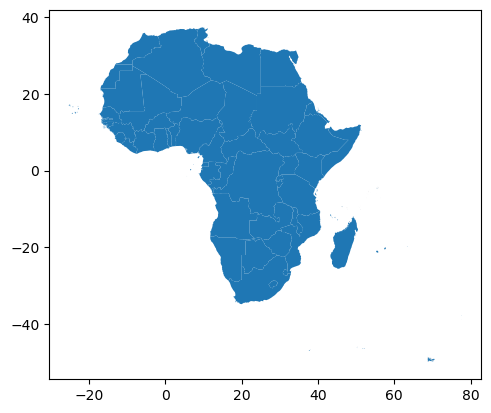

In [3]:
Africa_boundaries = gpd.read_file(resolve_path(config['Africa_boundaries_shp_path']))
cPIS2000 = gpd.read_file(resolve_path(config['CPIS_2000_shp_path']))
cPIS2021 = gpd.read_file(resolve_path(config['CPIS_2021_shp_path']))

Africa_boundaries.plot()
plt.show()

This is how one would overlay the datasets to get the CPIS2000_Africa / CPIS2021_Africa sets (see below)... if their computer was beefier

In [23]:
#CPIS2000_Africa = gpd.overlay(cPIS2000, Africa_boundaries, how = 'intersection')
#CPIS2021_Africa = gpd.overlay(cPIS2021, Africa_boundaries, how = 'intersection')

#CPIS2000_Africa.plot()
#plt.show()

In [24]:
#CPIS2000_Africa['Year'] = 2000
#CPIS2021_Africa['Year'] = 2021

#CPIS2000_Africa['Area'] = CPIS2000_Africa.geometry.area
#CPIS2021_Africa['Area'] = CPIS2021_Africa.geometry.area

Replication of Map from Africa_corporate_irrigation (GitHub via anna-boser)

C:\Users\ermil\AppData\Local\Temp\ipykernel_6616\2546683410.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  CPIS_Africa['geometry'] = CPIS_Africa.geometry.buffer(0.1)


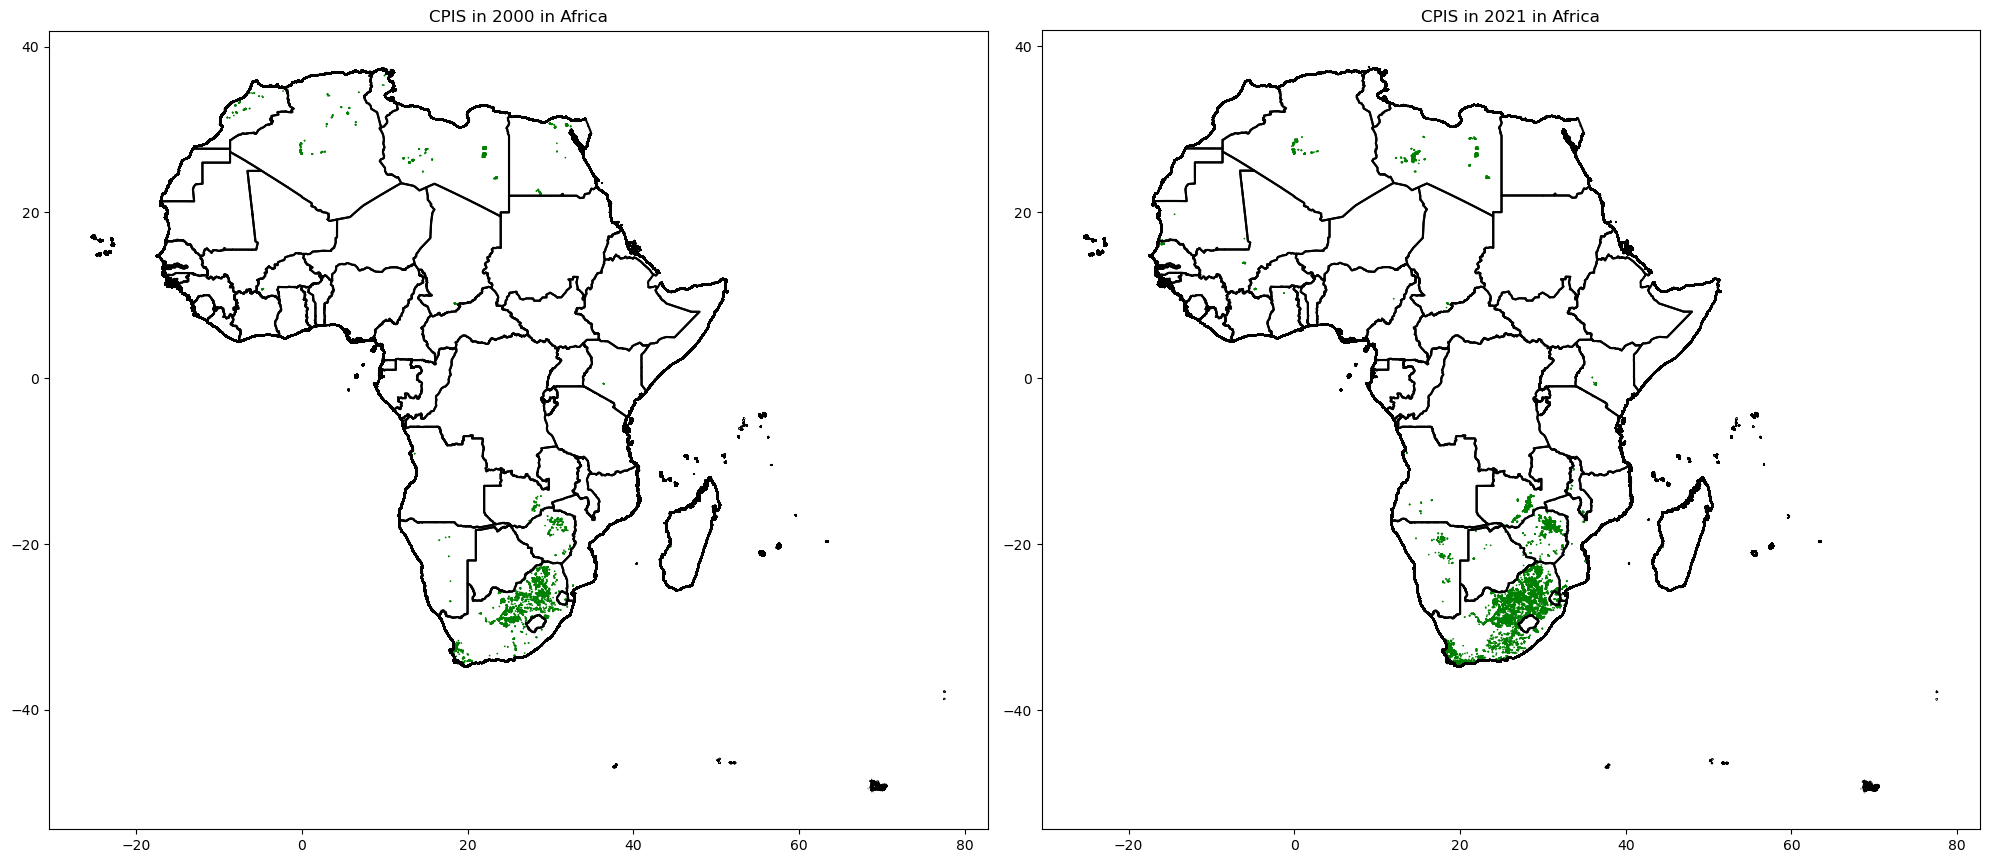

C:\Users\ermil\AppData\Local\Temp\ipykernel_6616\2546683410.py
C:\Users\ermil\AppData\Local\Temp\ipykernel_6616\2546683410
C:\Users\ermil\AppData\Local\Temp\ipykernel_6616\2546683410


In [6]:
CPIS_Africa = gpd.read_file(resolve_path(config['Africa_CPIS_shp_path']))
CPIS2000_Africa = gpd.read_file(resolve_path(config['Africa_CPIS_2000_shp_path']))
CPIS2021_Africa = gpd.read_file(resolve_path(config['Africa_CPIS_2021_shp_path']))

# Buffer the geometry to make it more visible
CPIS_Africa['geometry'] = CPIS_Africa.geometry.buffer(0.1)

# Create a single plot with two facets
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot the CPIS data for 2000
Africa_boundaries.boundary.plot(ax=axes[0], color='black')
CPIS_Africa[CPIS_Africa['Year'] == 2000].plot(ax=axes[0], color='green')
axes[0].set_title('CPIS in 2000 in Africa')

# Plot the CPIS data for 2021
Africa_boundaries.boundary.plot(ax=axes[1], color='black')
CPIS_Africa[CPIS_Africa['Year'] == 2021].plot(ax=axes[1], color='green')
axes[1].set_title('CPIS in 2021 in Africa')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#Save the combined figure
fig.savefig(utility.make_output_path('CPIS_2000_2021_Africa.png'))

C:\Users\ermil\AppData\Local\Temp\ipykernel_34684\1455042063.py


AttributeError: module 'ntpath' has no attribute 'splittext'

Find the area of CPIS per country and in total and save this information as a CSV, <br> <br>
Starting with the 2020 data...

In [26]:
# Reproject onto a common projected CRS (uses meters as units)
CPIS2000_Africa_projected = CPIS2000_Africa.to_crs(epsg=3395)

# Find the area covered by CPIS in each country in meters squared and in hectares
CPIS2000_Africa_projected['Area_m2'] = CPIS2000_Africa_projected.geometry.area
CPIS2000_Africa_projected['Area_1000ha'] = CPIS2000_Africa_projected['Area_m2'] / 10000000

# Assert:
#print(CPIS2000_Africa_projected.head(), '\n')

# Compute the total area and note it in the file
total_area_1000ha = CPIS2000_Africa_projected['Area_1000ha'].sum()

CPIS2000_Africa_projected['Area_total_1000ha'] = total_area_1000ha

# Drop the geometry and save the area data as a CSV
CPIS2000_Africa_projected = CPIS2000_Africa_projected.drop(columns='geometry')

output_dir2000 = resolve_path(config['Africa_CPIS_2000_Areas_shp_path'])

CPIS2000_Africa_projected.to_csv(output_dir2000, index=False)


Repeat with 2021 data...

In [29]:
# Reproject onto a common projected CRS (uses meters as units)
CPIS2021_Africa_projected = CPIS2021_Africa.to_crs(epsg=3395)

# Find the area covered by CPIS in each country in meters squared and in hectares
CPIS2021_Africa_projected['Area_m2'] = CPIS2021_Africa_projected.geometry.area
CPIS2021_Africa_projected['Area_1000ha'] = CPIS2021_Africa_projected['Area_m2'] / 10000000
#print(CPIS2021_Africa_projected.head(), '\n')

# Compute the total area and note it in the file
total_area_1000ha = CPIS2021_Africa_projected['Area_1000ha'].sum()

CPIS2021_Africa_projected['Area_total_1000ha'] = total_area_1000ha

# Drop the geometry and save the area data as a CSV
CPIS2021_Africa_projected = CPIS2021_Africa_projected.drop(columns='geometry')

output_dir2021 = resolve_path(config['Africa_CPIS_2021_Areas_shp_path'])

CPIS2021_Africa_projected.to_csv(output_dir2021, index=False)
